## 앙상블 기법

+ 무작위로 선택된 수천명의 사람들에게 복잡하거나 어려운 질문을 하고 대답을 모은다고 가정

+ 이렇게 모아진 답은 한명의 전문가의 답보다 나을 수 있음 -> 집단지성

+ 이처럼 일련의 분석기/예측기로부터 예측을 수집하면 가장 좋은 하나의 모델보다 더 좋은 예측을 얻을 수 있음

+ 일련의 분석기/예측기 -> 앙상블

+ 앙상블을 통해 학습 -> 앙상블 학습

+ 앙상블 학습 알고리즘 -> 보팅, 배깅, 부스팅, 스태킹

+ 머신러닝 경진대회에서 우승하고 싶다면 여러 앙상블 방법을 이용

### 투표기반 분류기 votting

+ 정확도가 좋은 분류기 여러 개를 이용해 학습

+ 로지스틱/SVM/랜덤포레스트/K최근접이웃 등등

+ 각 분류기로부터 예측을 모아 가장 많이 선택된 클래스를 예측 -> 큰수의 법칙

+ 하드보팅   : 다수결 투표로 결정함, 직접투표분류기

+ 소프트보팅 : 확률의 총합으로 결정, 간접투표분류기

+ sklearn에서는 VotingClassifier 제공

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.svm import SVC

#### 테스트용 데이터 생성

In [3]:
X, y = make_blobs(n_samples=350, centers=4, random_state = 2111111535, cluster_std=1.0)

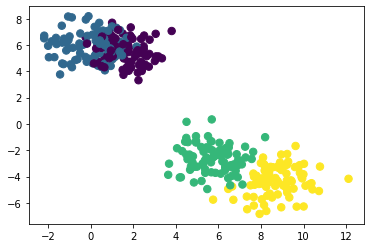

In [8]:
plt.scatter(X[:,0], X[:,1], c=y, s=55)

#### 데이터 분할

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify = y, random_state=2111111535)

#### 투표분류기 생성1
+ #### 직접투표 hardvoting: 모든 분류기가 클래스를 예측해서 개별분류기의 최빈값을 예측하고, 빈도값이 높은 클래스를 채택

In [14]:
lcf = LogisticRegression(max_iter=1000)
rfcf = RandomForestClassifier()
svcf = SVC()

#### 투표분류기 정의
+ #### voting : 투표방식 지정 (soft/hard)
+ #### estimators : 투표분류기에 사용할 개별 분류기 지정

In [15]:
voteclf = VotingClassifier(voting='hard', estimators=[('lr',lcf),('rf',rfcf),('sv',svcf)])

#### 훈련 및 평가

In [16]:
voteclf.fit(Xtrain, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()), ('sv', SVC())])

In [19]:
for cf in (lcf, rfcf, svcf, voteclf):
    cf.fit(Xtrain, ytrain)
    pred = cf.predict(Xtest)
    print(cf.__class__.__name__,cf.score(Xtrain, ytrain), accuracy_score(ytest, pred)) # 분류기 이름과 훈련시 정확도 출력

LogisticRegression 0.9047619047619048 0.8979591836734694
RandomForestClassifier 1.0 0.8734693877551021
SVC 0.9047619047619048 0.9102040816326531
VotingClassifier 0.9047619047619048 0.9102040816326531


#### 결정영역 시각화

In [20]:
import mldlpy3

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


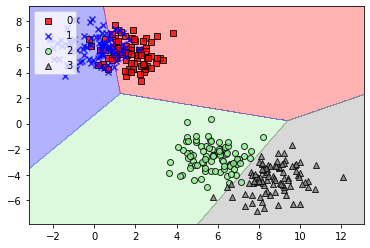

In [21]:
mldlpy3.plot_decision_regions(X, y, lcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


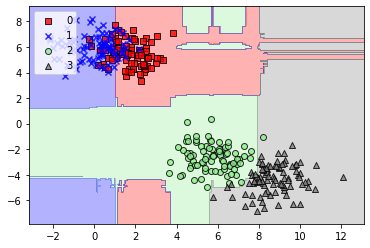

In [22]:
mldlpy3.plot_decision_regions(X, y, rfcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


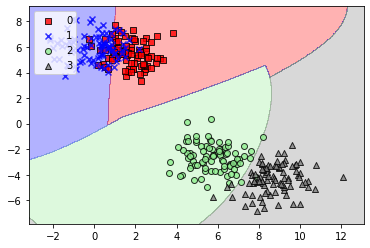

In [24]:
mldlpy3.plot_decision_regions(X, y, svcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


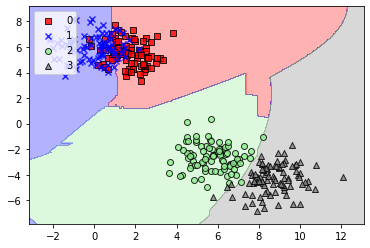

In [25]:
mldlpy3.plot_decision_regions(X, y, voteclf)

#### 투표분류기 생성 2
+ #### 간접투표 softvoting : 모든 분류기가 클래스의 확률을 예측해서 개별 분류기의 최빈값을 계산하고, 확률이 높은 클래스를 채택

In [26]:
lcf = LogisticRegression(max_iter=1000)
rfcf = RandomForestClassifier()
svcf = SVC(probability=True) # 확률예측

In [27]:
voteclf = VotingClassifier(voting='soft', estimators=[('lr',lcf),('rf',rfcf),('sv',svcf)])

In [28]:
voteclf.fit(Xtrain, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()),
                             ('sv', SVC(probability=True))],
                 voting='soft')

In [30]:
for cf in (lcf, rfcf, svcf, voteclf):
    cf.fit(Xtrain, ytrain)
    pred = cf.predict_proba(Xtest)
    print(cf.__class__.__name__,cf.score(Xtrain, ytrain), cf.score(Xtest, ytest))

LogisticRegression 0.9047619047619048 0.8979591836734694
RandomForestClassifier 1.0 0.8734693877551021
SVC 0.9047619047619048 0.9102040816326531
VotingClassifier 0.9333333333333333 0.8857142857142857


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


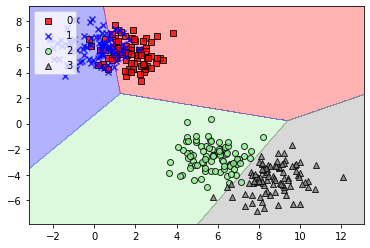

In [31]:
mldlpy3.plot_decision_regions(X, y, lcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


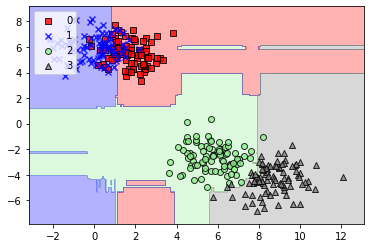

In [32]:
mldlpy3.plot_decision_regions(X, y, rfcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


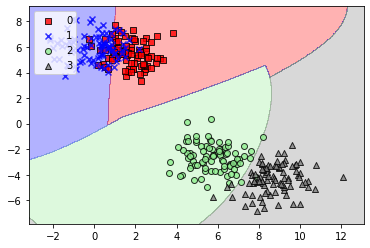

In [33]:
mldlpy3.plot_decision_regions(X, y, svcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


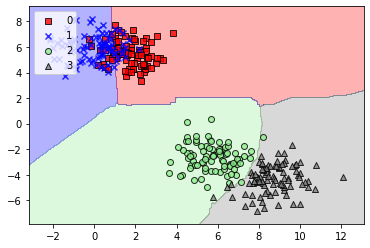

In [35]:
mldlpy3.plot_decision_regions(X, y, voteclf)

#### 테스트용 데이터 시각화 2

In [106]:
X, y = make_moons(n_samples=250, noise=0.05, random_state = 2111111615)

In [107]:
kcf = KNeighborsClassifier()
lcf = LogisticRegression(max_iter=1000)
rfcf = RandomForestClassifier()
svcf = SVC()

In [108]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify = y, random_state=2111111615)

In [109]:
voteclf = VotingClassifier(voting='hard', estimators=[('lr',lcf),('rf',rfcf),('sv',svcf),('kf',kcf)])

In [110]:
voteclf.fit(Xtrain, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()), ('sv', SVC()),
                             ('kf', KNeighborsClassifier())])

In [111]:
for cf in (lcf, rfcf, svcf, voteclf, kcf):
    cf.fit(Xtrain, ytrain)
    pred = cf.predict(Xtest)
    print(cf.__class__.__name__,cf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

LogisticRegression 0.8971428571428571 0.8533333333333334
RandomForestClassifier 1.0 0.9866666666666667
SVC 1.0 1.0
VotingClassifier 1.0 0.9866666666666667
KNeighborsClassifier 1.0 1.0


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


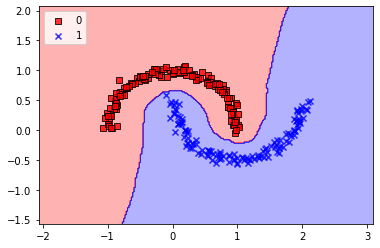

In [112]:
mldlpy3.plot_decision_regions(X, y, kcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


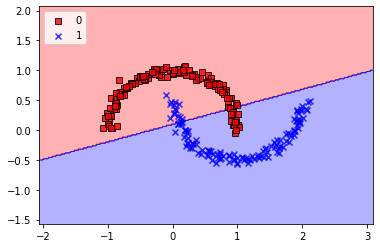

In [113]:
mldlpy3.plot_decision_regions(X, y, lcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


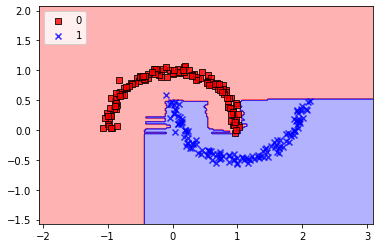

In [114]:
mldlpy3.plot_decision_regions(X, y, rfcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


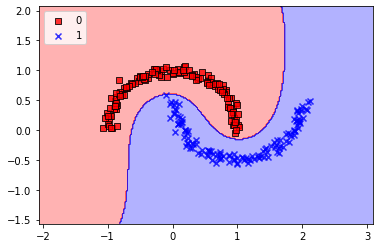

In [115]:
mldlpy3.plot_decision_regions(X, y, svcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


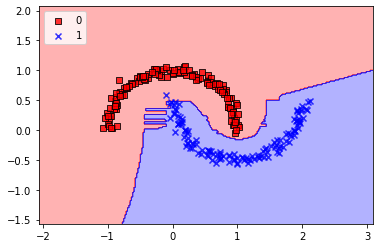

In [116]:
mldlpy3.plot_decision_regions(X, y, voteclf)

In [117]:
lcf = LogisticRegression(max_iter=1000)
rfcf = RandomForestClassifier()
svcf = SVC(probability=True)
kcf = KNeighborsClassifier()

In [118]:
voteclf = VotingClassifier(voting='soft', estimators=[('lr',lcf),('rf',rfcf),('sv',svcf),('kf',kcf)])

In [119]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify = y, random_state=2111111615)

In [120]:
voteclf.fit(Xtrain, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()),
                             ('sv', SVC(probability=True)),
                             ('kf', KNeighborsClassifier())],
                 voting='soft')

In [121]:
for cf in (lcf, rfcf, svcf, voteclf, kcf):
    cf.fit(Xtrain, ytrain)
    pred = cf.predict_proba(Xtest)
    print(cf.__class__.__name__,cf.score(Xtrain, ytrain), cf.score(Xtest, ytest))

LogisticRegression 0.8971428571428571 0.8533333333333334
RandomForestClassifier 1.0 0.9866666666666667
SVC 1.0 1.0
VotingClassifier 1.0 0.9866666666666667
KNeighborsClassifier 1.0 1.0


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


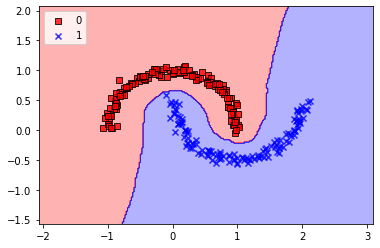

In [122]:
mldlpy3.plot_decision_regions(X, y, kcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


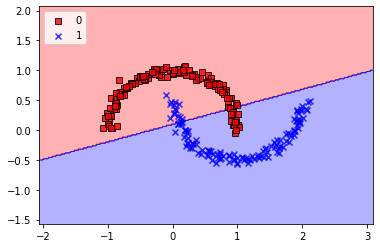

In [123]:
mldlpy3.plot_decision_regions(X, y, lcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


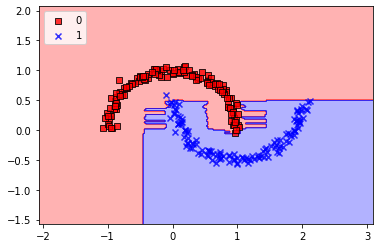

In [124]:
mldlpy3.plot_decision_regions(X, y, rfcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


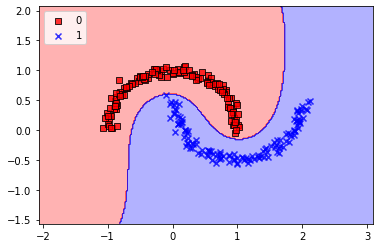

In [125]:
mldlpy3.plot_decision_regions(X, y, svcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


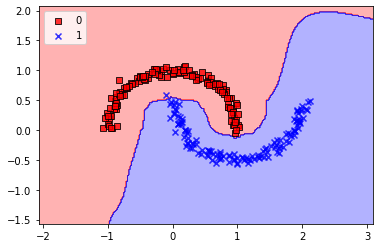

In [126]:
mldlpy3.plot_decision_regions(X, y, voteclf)

#### 테스트용 데이터 시각화 3

In [138]:
X, y = make_circles(n_samples=250, noise=0.05, factor=0.7, random_state = 2111111615)

In [128]:
kcf = KNeighborsClassifier()
lcf = LogisticRegression(max_iter=1000)
rfcf = RandomForestClassifier()
svcf = SVC()

In [129]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify = y, random_state=2111111615)

In [130]:
voteclf = VotingClassifier(voting='hard', estimators=[('lr',lcf),('rf',rfcf),('sv',svcf),('kf',kcf)])

In [131]:
voteclf.fit(Xtrain, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()), ('sv', SVC()),
                             ('kf', KNeighborsClassifier())])

In [132]:
for cf in (lcf, rfcf, svcf, voteclf, kcf):
    cf.fit(Xtrain, ytrain)
    pred = cf.predict(Xtest)
    print(cf.__class__.__name__,cf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

LogisticRegression 0.5314285714285715 0.48
RandomForestClassifier 1.0 0.8933333333333333
SVC 1.0 1.0
VotingClassifier 1.0 0.9733333333333334
KNeighborsClassifier 1.0 0.9733333333333334


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


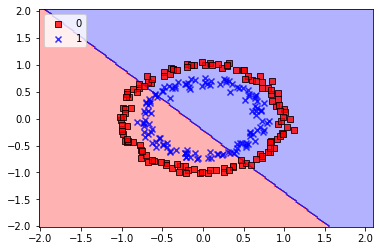

In [133]:
mldlpy3.plot_decision_regions(X, y, lcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


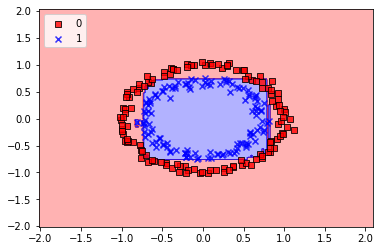

In [134]:
mldlpy3.plot_decision_regions(X, y, rfcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


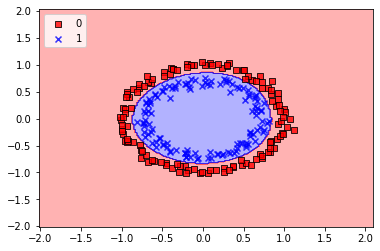

In [135]:
mldlpy3.plot_decision_regions(X, y, svcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


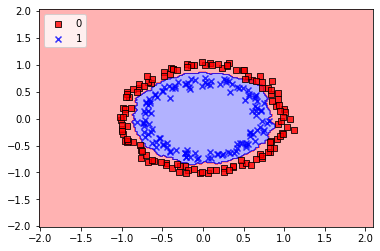

In [136]:
mldlpy3.plot_decision_regions(X, y, kcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


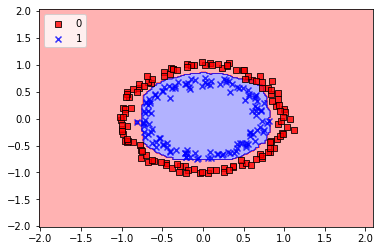

In [137]:
mldlpy3.plot_decision_regions(X, y, voteclf)

In [139]:
lcf = LogisticRegression(max_iter=1000)
rfcf = RandomForestClassifier()
svcf = SVC(probability=True)
kcf = KNeighborsClassifier()

In [140]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify = y, random_state=2111111615)

In [141]:
voteclf = VotingClassifier(voting='hard', estimators=[('lr',lcf),('rf',rfcf),('sv',svcf),('kf',kcf)])

In [142]:
voteclf.fit(Xtrain, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()),
                             ('sv', SVC(probability=True)),
                             ('kf', KNeighborsClassifier())])

In [143]:
for cf in (lcf, rfcf, svcf, voteclf, kcf):
    cf.fit(Xtrain, ytrain)
    pred = cf.predict(Xtest)
    print(cf.__class__.__name__,cf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

LogisticRegression 0.5314285714285715 0.48
RandomForestClassifier 1.0 0.92
SVC 1.0 1.0
VotingClassifier 1.0 0.9733333333333334
KNeighborsClassifier 1.0 0.9733333333333334


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


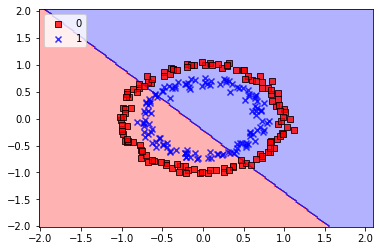

In [144]:
mldlpy3.plot_decision_regions(X, y, lcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


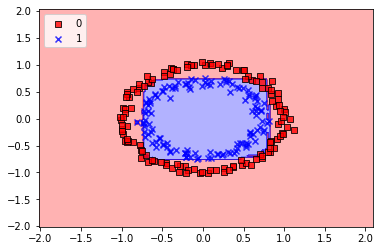

In [145]:
mldlpy3.plot_decision_regions(X, y, rfcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


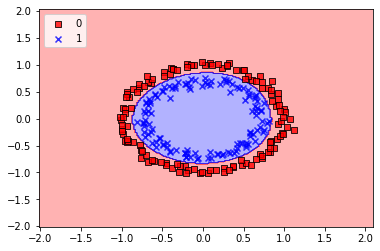

In [146]:
mldlpy3.plot_decision_regions(X, y, svcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


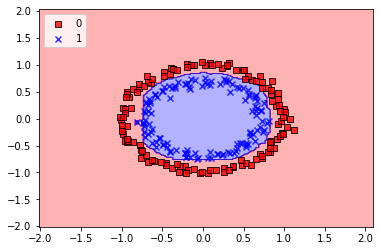

In [147]:
mldlpy3.plot_decision_regions(X, y, voteclf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


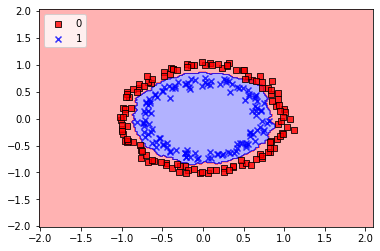

In [148]:
mldlpy3.plot_decision_regions(X, y, kcf)